## 1. Overview

The goal of this notebook is to explore trends in Canadian income and housing affordability over time.  
Specifically, this analysis examines:

- **Inflation adjustments (CPI-based)** to express all monetary values in constant 2023 dollars, allowing fair comparisons across years  
- **Average rent prices** across Canada since 1987  
- **Median household income** and how it has evolved since 1976  
- **Gender wage gap trends** based on available data from 2000 - 2023  

This work builds on the previous data cleaning and CPI adjustment steps.  
The objective of this notebook is to visualize and interpret how real income and rent costs have changed over time, and to assess whether income growth has kept pace with the rising cost of living.

Let's first look at how the median average rent amount has changed over the years. I will plot the real time (nominal) rent amounts in red and the adjusted value comparable to 2023 dollar in green.

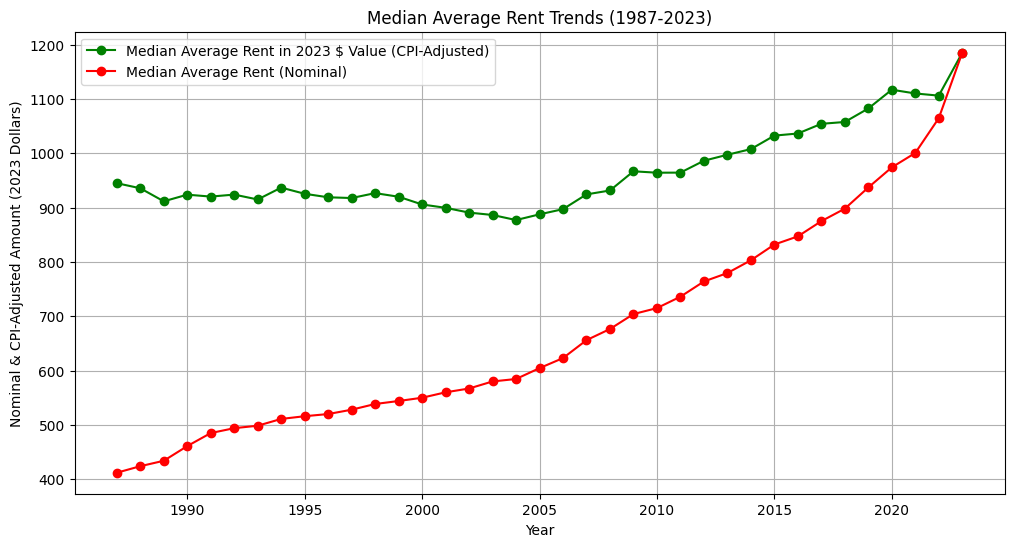

    year  median_avg_rent_value  median_avg_rent_value_adjusted
0   1987                  412.0                      944.893431
1   1988                  424.0                      935.539326
2   1989                  434.0                      911.516043
3   1990                  461.0                      923.764031
4   1991                  485.0                      920.211353
5   1992                  494.0                      923.897619
6   1993                  498.5                      914.887266
7   1994                  511.0                      936.733956
8   1995                  516.0                      925.383562
9   1996                  520.0                      918.920135
10  1997                  528.0                      917.575221
11  1998                  538.5                      926.597481
12  1999                  544.0                      919.939720
13  2000                  550.0                      905.712788
14  2001                  560.0         

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
rent_path = "../data/processed/median-rent-clean-1987-2023.csv"
cpi_path = "../data/processed/cpi-clean-all-items.csv"

rent_df = pd.read_csv(rent_path)
cpi_df = pd.read_csv(cpi_path)

# CPI-adjusted rent trends
base_cpi = cpi_df.loc[cpi_df["year"] == 2023, "cpi_value"].values[0]

rent_df_merged = pd.merge(rent_df, cpi_df, on="year", how="left")
rent_df_merged["median_avg_rent_value_adjusted"] = (
    rent_df_merged["median_avg_rent_value"] * (base_cpi / rent_df_merged["cpi_value"])
)

# Plot CPI-adjusted rent trends
plt.figure(figsize=(12, 6))
plt.plot(rent_df_merged["year"], rent_df_merged["median_avg_rent_value_adjusted"], marker="o", label="Median Average Rent in 2023 $ Value (CPI-Adjusted)", color="green")
plt.plot(rent_df_merged["year"], rent_df_merged["median_avg_rent_value"], marker="o", label="Median Average Rent (Nominal)", color="red")
plt.title("Median Average Rent Trends (1987-2023)")
plt.xlabel("Year")
plt.ylabel("Nominal & CPI-Adjusted Amount (2023 Dollars)")
plt.legend()
plt.grid()
plt.show()
print(rent_df_merged[["year", "median_avg_rent_value", "median_avg_rent_value_adjusted"]])

## Remarks

# Purchasing Power
The green line represents the value of median average rent comparable to 2023 dollar. It shows how affordable rent was at a specific point in time. We can see that between 1987 and 2000, rent was failry equally as affordable, with the green line even going down at some point (meaning rent was more affordable that year). However, we can see it started becoming less and less affordable starting in 2000s. We can also see that $412 in 1987 could get us what $944.89 would get us now. This tells us that the purchasing power was more than twice as strong in 1987 compared to 2023. 

# Nominal rent prices
Looking at the red line, we can see that the median average rent has risen from $412 in 1987 to $1185 in 2023. We can conclude that the median average rent price increased nearly 3 times over those years. For comparable standards of living, our income should grow by the same amount.

Next, I will look at median income from 1976 to 2023. As the trend is similar among all 3 types of families, we will only look at economic families for the sake of simplicity. 

I will adjust income values to account for inflation using the consumer price index (CPI). This adjustment will allow me to display these values not only in their real-time amounts, but in the amounts comparable to the purchasing power of a 2023 dollar as well. For example, median household income in 1976 was $87 300. After accounting for the inflation using the CPI, that amount is comparable to $440 991 in 2023 dollar value. So, I will be using the adjusted amount to display the change in the purchasing power over the years.

I will display both nominal value (orange) and the adjusted value (blue).

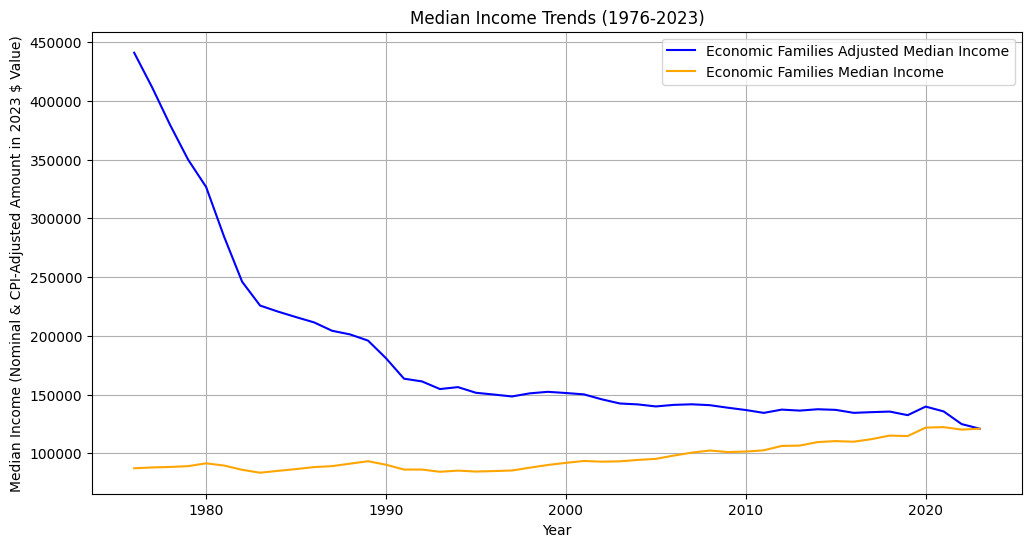

    year  Economic families  Economic families adjusted
0   1976            87300.0               440991.318328
1   1977            88000.0               411452.380952
2   1978            88400.0               379443.715847
3   1979            89100.0               349940.250000
4   1980            91500.0               326696.590909
5   1981            89600.0               284366.868687
6   1982            86000.0               246094.717668
7   1983            83500.0               225780.550775
8   1984            85100.0               220614.026403
9   1985            86600.0               215950.158730
10  1986            88300.0               211462.347561
11  1987            89100.0               204344.671533
12  1988            91200.0               201229.213483
13  1989            93300.0               195954.946524
14  1990            90300.0               180945.535714
15  1991            86200.0               163550.966184
16  1992            86200.0               161214

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
income_path = "../data/processed/median-income-clean-1976-2023.csv"
cpi_path = "../data/processed/cpi-clean-all-items.csv"

income_df = pd.read_csv(income_path)
cpi_df = pd.read_csv(cpi_path)

# CPI-adjusted income trends
base_cpi = cpi_df.loc[cpi_df["year"] == 2023, "cpi_value"].values[0]

income_df_merged = pd.merge(income_df, cpi_df, on="year", how="left")
income_df_merged["Economic families adjusted"] = (
    income_df_merged["Economic families"] * (base_cpi / income_df_merged["cpi_value"]))

# Plot CPI-adjusted income trends
plt.figure(figsize=(12, 6))
plt.plot(income_df_merged["year"], income_df_merged["Economic families adjusted"], label="Economic Families Adjusted Median Income", color="blue")
plt.plot(income_df_merged["year"], income_df_merged["Economic families"], label="Economic Families Median Income", color="orange")
plt.title("Median Income Trends (1976-2023)")
plt.xlabel("Year")
plt.ylabel("Median Income (Nominal & CPI-Adjusted Amount in 2023 $ Value)")
plt.legend()
plt.grid()
plt.show()

print(income_df_merged[["year", "Economic families", "Economic families adjusted"]])

From the graph, we can see that the purchasing power of our income has decreased immensely. We went from making around 440 991 in 1976 (in value comparable to 2023 dollar) to 121 000 in 2023. The purchasing power of our income is nearly 4 times less than what it used to be in the 70s, after accounting for the cost of living.

## Gender Wage Gap Trends (2000 - 2023)
In this section, I will analyze income differences between male and female earners over time to understand the gender wage gap.

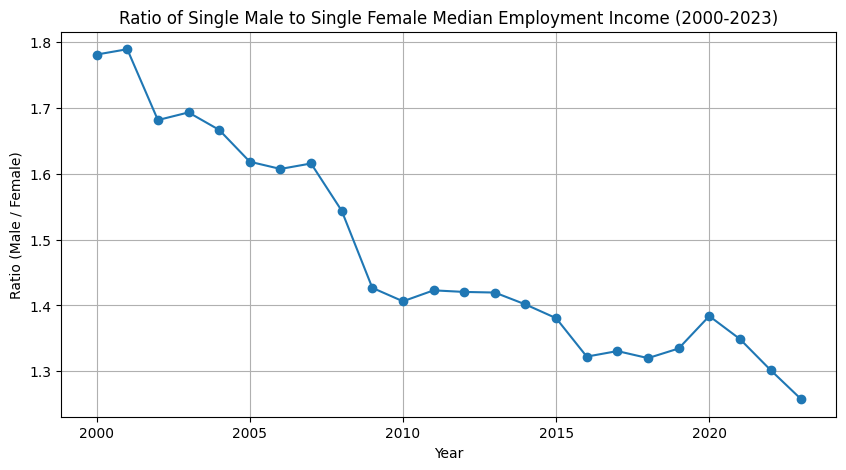

0     1.781065
1     1.789157
2     1.681564
3     1.693182
4     1.666667
5     1.618280
6     1.607330
7     1.615630
8     1.543895
9     1.426745
10    1.406324
11    1.422951
12    1.420552
13    1.419611
14    1.401551
15    1.380689
16    1.322300
17    1.330735
18    1.320016
19    1.334643
20    1.383903
21    1.349003
22    1.301945
23    1.257600
Name: ratio_male_to_female, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

income_by_gender_path = "../data/processed/median-income-clean-2000-2023.csv"
income_gender_df = pd.read_csv(income_by_gender_path)

# create a new column for the ratio: single male to single female
income_gender_df["ratio_male_to_female"] = income_gender_df["median_emp_single_male"] / income_gender_df["median_emp_single_female"]

# plot the ratio over time
plt.figure(figsize=(10, 5))
plt.plot(income_gender_df["year"], income_gender_df["ratio_male_to_female"], marker='o')
plt.title("Ratio of Single Male to Single Female Median Employment Income (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Ratio (Male / Female)")
plt.grid()
plt.show()

print(income_gender_df["ratio_male_to_female"])

## Remarks
I've generated a new column (ratio_male_to_female) comparing male vs female median income over the years. This column is a ratio, meaning that for equal pay, we would need a ratio of 1. Looking at the graph, we can see that the gender wage gap has closed significantly over the years, coming down from 1.78 in 2000 to 1.26 in 2023. However, looking into these ratios further, we need to ackgnowledge that, even though the gender pay gap has been closing, men still made 26% more in 2023 than women, which is still a significant difference that needs to be addressed. This means that in 2023, women earned 74 000 for every 100 000 earned by men. Further work could explore research studies that explain what factors contributed to the narrowing gender wage gap since 2000 and why disparities remain.